# Linearization Exercises

In [4]:
import numpy as np
import math
import scipy.optimize as opt
from matplotlib import pyplot as plt

 Section 1.4 gives the answers in terms of $\bar{K}$ 

$$ F = \frac{\alpha \bar{K}^{\alpha - 1}}{\bar{K}^{\alpha} - \bar{K}}$$
$$ G = - \frac{\alpha \bar{K}^{\alpha - 1}(\alpha + \bar{K}^{\alpha - 1})}{\bar{K}^{\alpha} - \bar{K}} $$
$$ H = \frac{\alpha^2 \bar{K}^{2(\alpha - 1)}}{\bar{K}^{\alpha} - \bar{K}} $$
$$ L = - \frac{\alpha \bar{K}^{2 \alpha - 1}}{\bar{K}^{\alpha} - \bar{K}} $$
$$ M = \frac{\alpha^2 \bar{K}^{2(\alpha - 1)}}{\bar{K}^{\alpha} - \bar{K}} $$

and from DSGE Exercise 1, we know that $A = \alpha \beta$, $\bar{K} = A^{\frac{1}{1-\alpha}}$. Further,
$$ N = \rho$$

and 

$$ P =  \frac{- G \pm \sqrt{G^2 - 4FH}}{2F} $$

$$ Q = - \frac{LN + M}{FN +FP +G}$$

In [2]:
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02

In [8]:

A = alpha*beta
Kbar = A**(1/(1 - alpha))

F = (alpha*Kbar**(alpha - 1))/(Kbar**alpha - Kbar)
G = - (alpha*Kbar**(alpha - 1) *\
       (alpha + Kbar**(alpha - 1)))/(Kbar**alpha - Kbar)
H = (alpha**2 * Kbar**(2*(alpha - 1)))/(Kbar**alpha - Kbar)
L = - (alpha * Kbar**(2*alpha - 1))/(Kbar**alpha - Kbar)
M = (alpha**2 * Kbar**(2*(alpha - 1)))/(Kbar**alpha - Kbar)
N = rho

P = (- G - math.sqrt(G**2 - 4*F*H))/(2*F)
Q = - (L*N + M)/(F*N + F*P + G)


In [13]:
print('F:', F, '\nG:', G, '\nH:', H,'\nL:', L,
      '\nM:', M, '\nN:', N,'\nP:', P, '\nQ:', Q)

F: 2.763343017362853 
G: -9.023563692703393 
H: 2.8197377728192374 
L: -1.5531326685925513 
M: 2.8197377728192374 
N: 0.95 
P: 0.35 
Q: 0.24750650674493596


In [44]:
from rouwen import rouwen
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
cmap1 = matplotlib.cm.get_cmap('summer')

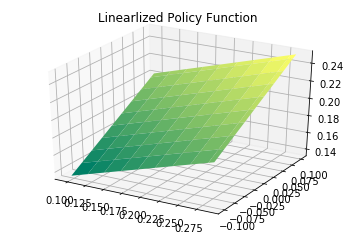

In [50]:
#%matplotlib inline
#%matplotlib notebook
sizek = 26
sizez = 26

k_grid = np.linspace(0.5*Kbar, 1.5*Kbar, sizek)
#print(k_grid.shape)
Pi, z_grid = rouwen(rho, 0, 10*sigma/(sizez - 1), sizez)


x, y = np.meshgrid(k_grid, z_grid)
Hk = np.empty((sizek, sizez))
for i in range(sizek):
    for j in range(sizez):
        Hk[i,j] = Kbar + P*(k_grid[i] - Kbar) + Q*z_grid[j]


        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(x, y, Hk, rstride = 3, cstride = 3, cmap=cmap1)
plt.title('Linearlized Policy Function')
plt.show()



### Exercise 2

Realized we have the following at our disposal:

In [48]:
from LinApp_Deriv import LinApp_Deriv
from LinApp_FindSS import LinApp_FindSS
from LinApp_Solve import LinApp_Solve


In [128]:
def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Kpp, Kp, K, Zp, Z) = theta0
    
    # Evaluate Euler equations
    E = beta * ((alpha * np.exp(Zp) * Kp **(alpha - 1))/( np.exp(Zp) * Kp ** alpha - Kpp)) - \
    1 / (np.exp(Z) * K **alpha - Kp)
    
    
    return np.array([E])

In [129]:
# set LinApp parameters
Zbar = np.array([0.])
nx = 1
ny = 0
nz = 1
logX = 0
Sylv = 0
params = (alpha, beta)

# set up steady state input vector
theta0 = np.array([Kbar, Kbar, Kbar, 0., 0.])

In [131]:
# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT] = \
    LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)
np.set_printoptions(suppress=False)
np.set_printoptions(precision=6)

print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

# set value for NN    
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv)
print ('PP:',PP)
print ('QQ', QQ)

FF:  [[ 7.333676]]
GG:  [[-23.947768]]
HH:  [[ 7.483343]]
LL:  [[-1.413805]]
MM:  [[ 4.121882]]
PP: [[ 0.35]]
QQ [[ 0.192783]]


### Problem 3

Do the necessary tedious matrix algebra necessary to transform equation \eqref{Linear_Approx3LogLin} into \eqref{Linear_Trans2LogLin}.

We have the laws of motion
$$\tilde{Z_t}=N\tilde{Z}_{t-1} + \varepsilon_t$$
and
$$\tilde{X_t} = P\tilde{X}_{t-1}+Q\tilde{Z_t}$$
and the convenient mean zero of the error term:
$$E\{\varepsilon_t\}=0$$

such that we can transform


$$0 = E_t\{F \tilde{X}_{t+1} + G \tilde{X_t}+H \tilde{X}_{t-1} + L \tilde{Z}_{t+1} + M \tilde{Z_t}\} $$

$$= F [ P \tilde{X_t}+ Q \tilde{Z}_{t+1}] + G [ P \tilde{X}_{t-1} + Q \tilde{Z_t}] + H \tilde{X}_{t-1} + L N \tilde{Z}_{t} + M \tilde{Z_t}$$

$$= F [ P [ P \tilde{X_t-1}+ Q \tilde{Z}_{t}]+ Q N \tilde{Z}_{t}] + G [ P \tilde{X}_{t-1} + Q \tilde{Z_t}] + H \tilde{X}_{t-1} + L N \tilde{Z}_{t} + M \tilde{Z_t}$$


$$=  F P^2 \tilde{X}_{t-1}+ F P Q \tilde{Z_t} + F Q N \tilde{Z}_{t} + G P \tilde{X}_{t-1} + G Q \tilde{Z_t} + H \tilde{X}_{t-1} + L N \tilde{Z}_{t} + M \tilde{Z_t}$$

$$= [(FP+G)P+H]\tilde{X}_{t-1}+[(FQ+L)N+(FP+G)Q+M]\tilde{Z_t} \quad \square$$

### Problem 4

In [137]:
gamma = 2.5
xi = 1.5
beta = 0.98
alpha = 0.4
a = 0.5
delta = 0.10
z_bar = 0
rho = 0.9
tau = 0.05

In [153]:
def Modeldefs(Xp, X, Y, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Y: GDP
        w: wage rate
        r: rental rate on capital
        T: transfer payments
        c: consumption
        u: utiity
    '''
    
    # unpack input vectors
    kp = Xp
    k = X
    ell = Y
    z = Z
    
    # find definintion values
    Y = k**alpha*(np.exp(z)*ell)**(1-alpha)
    w = (1-alpha) * k ** (alpha) * ell ** (-alpha) * np.exp(Z) ** (1-alpha)
    r = alpha * (k ** (alpha-1)) * (ell ** (1-alpha)) * np.exp(Z) ** (1-alpha)
    c = (w*ell + (r - delta)*k) + k - kp
    u = (((c ** (1-gamma)) - 1) / (1-gamma)) + a * (((1 - ell) ** (1 - xi) - 1) / (1 - xi))
    return Y, w, r, c, u

In [154]:
def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theta0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    ell = Y
    delta, tau, z_bar, alpha, gamma, xi, beta, a = params
    
    # find definitions for now and next period
    Y, w, r, c, u = Modeldefs(Xp, X, Y, Z, params)
    Yp, wp, rp, cp, up = Modeldefs(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations
    
    E1 = a*((1-ell)**(-xi)) - w*(1-tau)*(c**(-gamma))
    E2 = (c**(-gamma)) - beta*(cp**(-gamma))*((1-tau)*(rp-delta)+1)
    
    
    return np.array([E1, E2])

In [155]:
# make parameter list to pass to functions
params = (delta, tau, z_bar, alpha, gamma, xi, beta, a)

# set LinApp parameters
Zbar = np.array([z_bar])
nx = 1
ny = 1
nz = 1
logX = 0
Sylv = 0



In [156]:
# take a guess for steady state values of k and ell
guessXY = np.array([4,0.5])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, 0., 0.])


XYbar:  [ 4.225229  0.579791]


In [157]:

# check SS solution
check = Modeldyn(theta0, params)
np.set_printoptions(suppress=False)
np.set_printoptions(precision=6)
print ('check: ', check)
if np.max(np.abs(check)) > 1e-6:
    print ('Have NOT found steady state')
    
Ybar, wbar, rbar, cbar, ubar = Modeldefs(kbar, kbar, ellbar, 0, params)
Tbar = tau*cbar
Ibar =  delta*kbar
print ('Ybar: ', Ybar)
print ('wbar: ', wbar)
print ('rbar: ', rbar)
print ('cbar: ', cbar)
print ('ubar: ', ubar)
print ('Tbar: ', Tbar)
print ('Ibar: ', Ibar)

check:  [ -5.995204e-14   7.549517e-15]
Ybar:  1.28322610883
wbar:  1.32795276835
rbar:  0.121482277121
cbar:  0.860703206154
ubar:  -0.710872638118
Tbar:  0.0430351603077
Ibar:  0.422522902678


### Exercise 5

In [147]:
#see other

### Exercise 6

In [170]:
def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theta0
    #print(theta0)
    (Xpp, ellpp, Xp, ellp, X, ell, Zp, Z) = theta0

    delta, tau, z_bar, alpha, gamma, xi, beta, a = params
    
    # find definitions for now and next period
    Y, w, r, c, u = Modeldefs(Xp, X, ellp, Z, params)
    Yp, wp, rp, cp, up = Modeldefs(Xpp, Xp, ellpp, Zp, params)
    
    # Evaluate Euler equations
    
    
    E1 = a*((1-ell)**(-xi)) - w*(1-tau)*(c**(-gamma))
    E2 = (c**(-gamma)) - beta*(cp**(-gamma))*((1-tau)*(rp-delta)+1)
    
    return np.array([E1, E2])


In [171]:
# make parameter list to pass to functions
params = (delta, tau, z_bar, alpha, gamma, xi, beta, a)

# set LinApp parameters
Zbar = np.array([z_bar])
nx = 2 # ell now 'belongs' to the state
ny = 0 
nz = 1
logX = 0
Sylv = 0


In [186]:
# take a guess for steady state values of k and ell
guessXY = np.array([4,0.5])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
theta0 = np.array([kbar, ellbar, kbar, ellbar, kbar, ellbar, 0., 0.])



XYbar:  [ 4.225229  0.579791]


In [189]:
Kbar, ellbar = XYbar
Kbar, ellbar

(4.2252290267841666, 0.57979145316700331)

In [174]:

# check SS solution
check = Modeldyn(theta0, params)
np.set_printoptions(suppress=False)
np.set_printoptions(precision=6)
print ('check: ', check)
if np.max(np.abs(check)) > 1e-6:
    print ('Have NOT found steady state')
    
Ybar, wbar, rbar, cbar, ubar = Modeldefs(kbar, kbar, ellbar, 0, params)
Tbar = tau*cbar
Ibar =  delta*kbar
print ('Ybar: ', Ybar)
print ('wbar: ', wbar)
print ('rbar: ', rbar)
print ('cbar: ', cbar)
print ('ubar: ', ubar)
print ('Tbar: ', Tbar)
print ('Ibar: ', Ibar)

check:  [ -5.995204e-14   7.549517e-15]
Ybar:  1.28322610883
wbar:  1.32795276835
rbar:  0.121482277121
cbar:  0.860703206154
ubar:  -0.710872638118
Tbar:  0.0430351603077
Ibar:  0.422522902678


In [177]:

# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT] = \
    LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)
np.set_printoptions(suppress=False)
np.set_printoptions(precision=6)

print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

# set value for NN    
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv)
print ('PP:',PP)
print ('QQ', QQ)

FF:  [[ 0.        0.      ]
 [-4.226229  5.441935]]
GG:  [[-5.331621  8.346512]
 [ 8.566616 -5.612233]]
HH:  [[ 5.272383  6.55238 ]
 [-4.317018  0.      ]]
LL:  [[ 0.      ]
 [ 3.155187]]
MM:  [[ 3.003659]
 [-3.253925]]
It looks like we have unstable roots. This might not work...
Sylvester equation solver condition is not satisfied; proceed with the original method...
PP: [[ 0.994227  2.860774]
 [ 0.003409  1.042374]]
QQ [[ 0.541323]
 [-0.014082]]


/Users/Jan/anaconda/lib/python3.6/site-packages/scipy/linalg/decomp.py:60: RuntimeWarning: divide by zero encountered in true_divide
  w = (alphar + _I * alphai) / beta
/Users/Jan/anaconda/lib/python3.6/site-packages/scipy/linalg/decomp.py:60: RuntimeWarning: invalid value encountered in true_divide
  w = (alphar + _I * alphai) / beta


### Exercise 7

See next notebook